# Link Google Colab
[Google Colab](https://colab.research.google.com/drive/1M2DAvZxxuLH7N8YtmPxMUjXM88aEbJSb?usp=sharing)

# Apa itu Deret Waktu?
- Rangkaian data yang dicatat berdasarkan urutan waktu dalam jangka waktu tertentu.
- Biasanya mempunyai interval/jarak waktu yang sama antar titik data.
- Contoh:
  - Data harga penjualan bulanan
  - Data suhu per jam

# Kolom-kolom Data Deret Waktu

## Kolom Tanggal
- Dalam deret waktu pasti ada kolom **tanggal-waktu** atau **datetime**.
- Tanpa kolom ini, sulit untuk mengidentifikasi urutan atau pola waktu dari data yang ada.

### Frekuensi Data
- Sebagian besar model deret waktu mengasumsikan bahwa data diambil pada interval yang **teratur**. - Artinya, jarak antar titik data harus konsisten dalam rentang waktu tertentu.
- Beberapa jenis frekuensi yang umum digunakan dalam analisis deret waktu:

- **D**: Frekuensi harian, setiap hari kalender.
- **B**: Frekuensi hari kerja (business day), tidak termasuk hari libur dan akhir pekan.
- **W**: Frekuensi mingguan, biasanya dihitung pada hari tertentu setiap minggunya (misalnya, Senin).
- **M**: Frekuensi bulanan pada akhir bulan.
- **MS**: Frekuensi bulanan pada awal bulan.
- **A** atau **Y**: Frekuensi tahunan, biasanya pada akhir tahun (31 Desember).
- **H**: Frekuensi setiap jam.
- **T** atau **min**: Frekuensi setiap menit.
- **S**: Frekuensi setiap detik.

### Kenapa Frekuensi Penting?
- Jika frekuensi data tidak teratur atau ada celah, kita perlu melakukan **imputasi data** atau penyesuaian frekuensi.

## Kolom Target/Data

Dalam analisis deret waktu, selain kolom tanggal-waktu (datetime), kita juga harus memiliki **kolom target** atau **kolom data** yang merepresentasikan nilai yang akan dianalisis atau diprediksi. Kolom ini berisi angka-angka yang menggambarkan variabel yang ingin kita pelajari dari waktu ke waktu, seperti harga saham, jumlah penjualan, suhu, atau data lainnya.

### Jenis-Jenis Kolom Data
Kolom data bisa berisi berbagai jenis informasi, tergantung pada konteks analisis:
- **Data Kuantitatif**: Seperti harga, volume penjualan, suhu, dan lainnya yang bisa diukur dalam angka.
- **Data Kategoris**: Seperti status (aktif/non-aktif), kelas risiko, atau kategori lainnya yang bisa diubah menjadi angka untuk keperluan analisis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
date_col = 'date'
target_col = 'urea_price'

In [3]:
url = 'https://github.com/hilmizr/world_fertilizer_price/raw/master/01-09-24-modified_fertilizer_datav5.xlsx'

# Read dataset
data = pd.read_excel(url, parse_dates=[date_col], index_col=date_col)

# Show the first few rows
display(data.head())

,dap_price,kcl_price,rock_price,tsp_price,urea_price
date,,,,,
1993-11-01,140.40,112.5,31.5,112.50,82.80
1993-12-01,150.38,112.5,31.5,122.50,85.50
1994-01-01,150.00,112.5,31.5,125.00,85.50
1994-02-01,151.75,112.5,31.5,125.63,85.50
1994-03-01,155.88,112.5,31.5,127.50,98.63


In [4]:
# Infer frequency
inferred_freq = data.index.inferred_freq
print(f"Inferred frequency: {inferred_freq}")

Inferred frequency: MS


### Resampling Data
Ketika bekerja dengan data deret waktu, terkadang kita perlu mengubah frekuensi data, misalnya dari data harian menjadi data bulanan, atau dari data menit menjadi data jam. Proses ini disebut **resampling**. Resampling dilakukan untuk **mengubah frekuensi** data, baik dengan **menurunkan** (downsampling) atau **menaikkan** (upsampling) frekuensi.

- **Downsampling**: Mengurangi jumlah data dengan menggabungkan data pada frekuensi yang lebih rendah. Misalnya, mengubah data harian menjadi data bulanan.
- **Upsampling**: Meningkatkan jumlah data dengan mengisi nilai untuk frekuensi yang lebih tinggi. Misalnya, mengubah data bulanan menjadi data harian.

#### Contoh Downsampling
Misalnya, kita ingin mengubah data harian menjadi data bulanan dengan menggunakan nilai rata-rata setiap bulan. Dalam Python menggunakan `pandas`, kita bisa melakukan resampling seperti ini:
```python
data_bulanan = data.resample('M').mean()
```

#### Contoh Upsampling
Untuk mengubah data bulanan menjadi data harian, kita bisa menggunakan:
```python
data_harian = data.resample('D').asfreq()
```
Pada upsampling, terkadang kita perlu mengisi nilai yang hilang. Kita bisa mengisi dengan metode seperti **forward fill** atau **backward fill**:
```python
data_harian = data.resample('D').ffill()  # Mengisi dengan nilai sebelumnya
```

#### Mengapa Resampling Penting?
Resampling berguna ketika frekuensi data asli tidak sesuai dengan kebutuhan analisis atau model. Misalnya, jika kita ingin menganalisis tren tahunan tetapi hanya memiliki data bulanan

In [5]:
# Resampling the data to yearly frequency
yearly_data = data.resample('Y').mean()

# Display the resampled data
print("\nyearly resampled data:")
display(yearly_data)


yearly resampled data:


,dap_price,kcl_price,rock_price,tsp_price,urea_price
date,,,,,
1993-12-31,145.390000,112.500000,31.500000,117.500000,84.150000
1994-12-31,160.426667,112.500000,31.833333,132.105000,93.885833
1995-12-31,199.774167,112.500000,32.666667,149.631667,126.862500
1996-12-31,198.105833,112.500000,33.033333,175.830000,153.692500
1997-12-31,186.990833,112.500000,32.500000,171.909167,117.495000
1998-12-31,186.863333,112.500000,32.500000,173.049167,83.217500
1999-12-31,171.100833,112.500000,42.802500,154.490833,65.942500
2000-12-31,147.669167,112.500000,44.000000,137.708333,100.925000
2001-12-31,143.510833,112.500000,44.000000,126.875833,96.454167


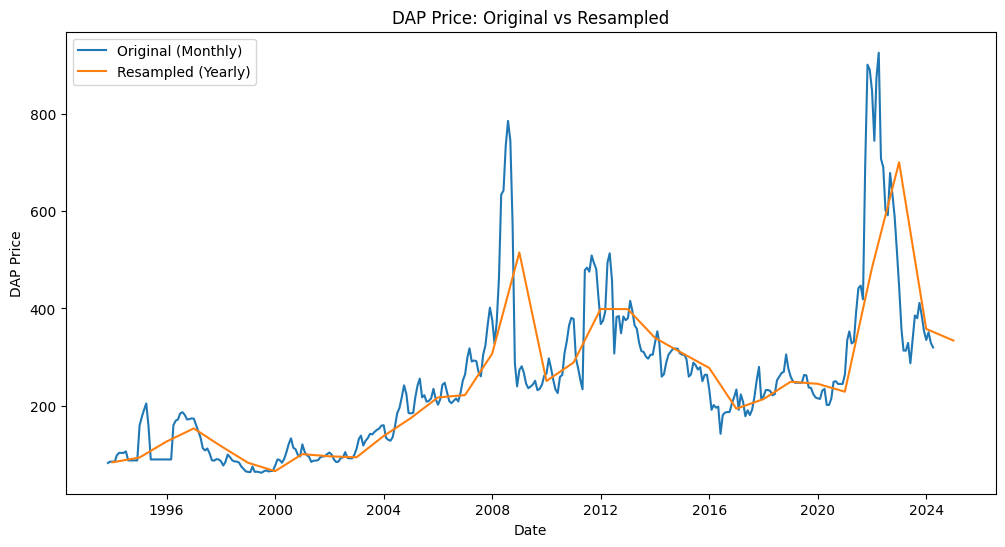

In [6]:
# Plot the original and resampled data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[target_col], label='Original (Monthly)')
plt.plot(yearly_data.index, yearly_data[target_col], label='Resampled (Yearly)')
plt.title('DAP Price: Original vs Resampled')
plt.xlabel('Date')
plt.ylabel('DAP Price')
plt.legend()
plt.show()

# Komponen Deret Waktu
Deret waktu terdiri dari 3 komponen utama

## Tren (Trend)
Tren adalah pola jangka panjang yang menunjukkan arah pergerakan data, apakah naik, turun, atau tetap konstan dari waktu ke waktu.

## Musiman (Seasonal)
Komponen musiman mengacu pada pola berulang yang terjadi pada interval yang tetap, seperti harian, mingguan, bulanan, atau tahunan. Pola ini biasanya disebabkan oleh faktor-faktor seperti cuaca, liburan, atau kebiasaan konsumen. Ada dua model utama untuk menangani komponen musiman:

### Additive
- Efek musiman konstan dan tidak bergantung pada tingkat keseluruhan data.
- Dalam model aditif, variasi musiman dianggap sebagai penambahan konstan terhadap tren.

### Multiplicative
- Efek musiman berubah sesuai dengan tingkat keseluruhan data.
- Variasi musiman dianggap sebagai faktor pengali terhadap tren.

## Residu (Residual)
Residu, atau variasi acak, adalah komponen yang tidak dapat dijelaskan oleh tren atau pola musiman. Fluktuasi acak yang tidak dapat diprediksi dan tidak memiliki pola yang jelas.

Analisis residu penting untuk mengevaluasi kualitas model deret waktu, karena residu yang besar dapat menunjukkan bahwa model tersebut tidak sepenuhnya menangkap pola dalam data.

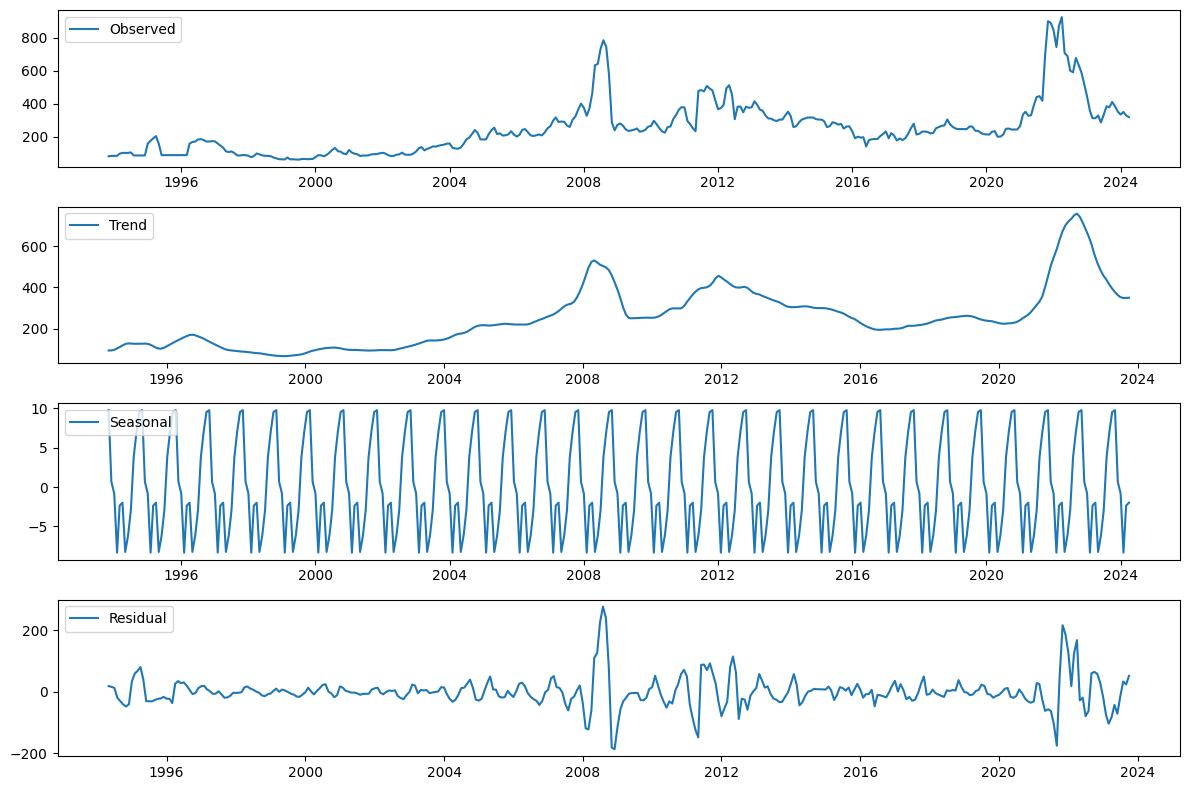

In [7]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data[target_col], model='additive', period=12)

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

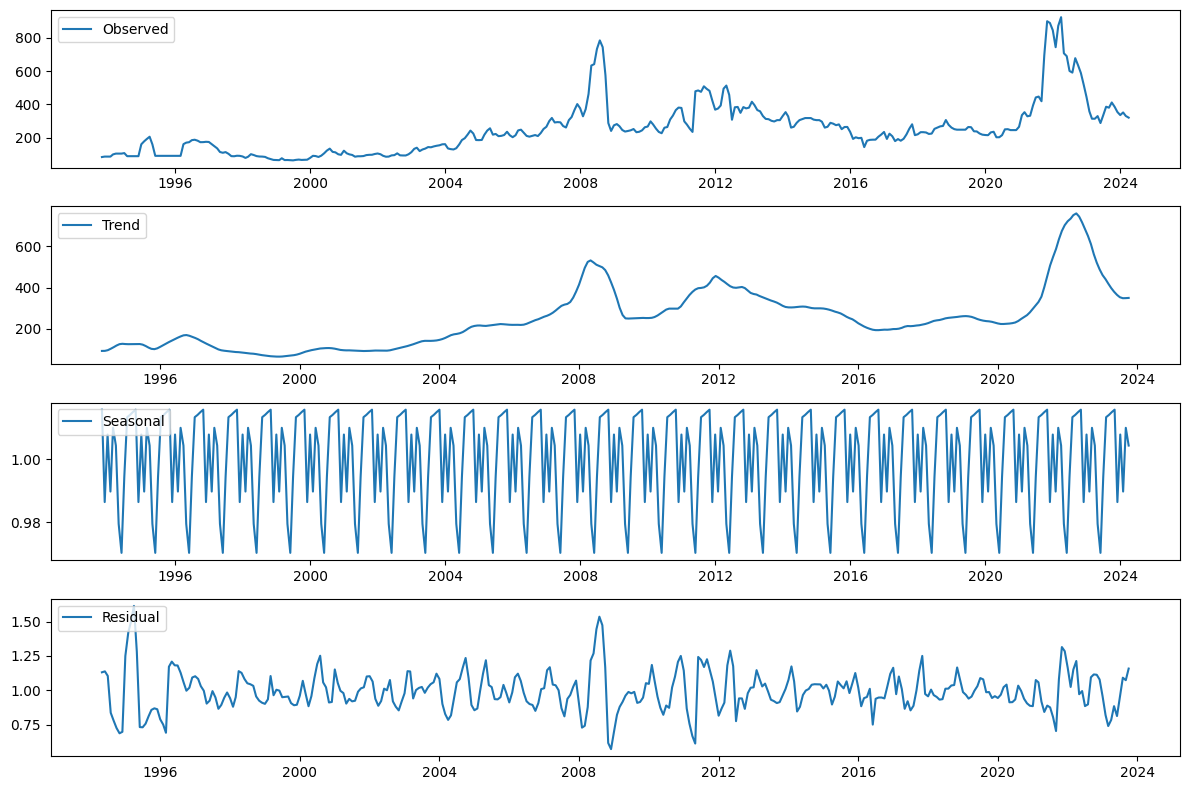

In [8]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data[target_col], model='multiplicative', period=12)

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Stationarity (Stasioneritas)

## Apa itu Stasioneritas?

Stasioneritas adalah kondisi di mana statistik dari data deret waktu tidak berubah sepanjang waktu. Sebuah deret waktu dikatakan stasioner jika memenuhi dua kriteria utama:

1. Rata-rata yang konstan dari waktu ke waktu.
2. Variansi yang konstan dari waktu ke waktu.

Secara visual, data yang stasioner akan berfluktuasi di sekitar nilai rata-rata yang tetap, tanpa menunjukkan tren naik atau turun yang jelas.

## Kenapa Deret Waktu harus Stasioner?

Deret waktu perlu stasioner karena beberapa alasan penting:

1. Memenuhi asumsi model: Banyak model deret waktu, seperti ARIMA, mengasumsikan data yang stasioner untuk dapat diterapkan dengan benar.

2. Meningkatkan akurasi peramalan: Data yang stasioner memungkinkan peramalan yang lebih akurat karena pola data lebih konsisten dan mudah diprediksi.

3. Memudahkan interpretasi: Data stasioner lebih mudah diinterpretasi karena karakteristik statistiknya tidak berubah seiring waktu.

Jika data tidak stasioner, perlu dilakukan transformasi untuk mencapai kestasioneran. Bisa melibatkan differencing untuk tren linier, transformasi logaritma untuk tren eksponensial, atau metode lain sesuai dengan karakteristik data.



## Uji Stationeritas
### Uji Augmented Dickey-Fuller (ADF)
Uji Augmented Dickey-Fuller (ADF) adalah metode statistik yang digunakan untuk memeriksa apakah suatu deret waktu stasioner atau tidak.

- Hipotesis Nol (H0): Deret waktu tidak stasioner.
- Hipotesis Alternatif (Ha): Deret waktu stasioner.

Cara Membaca Hasil Uji ADF:

- Jika p-value < 0.05: Hipotesis nol (H0) ditolak, yang berarti deret waktu stasioner.
- Jika p-value > 0.05: Hipotesis nol (H0) diterima, yang berarti deret waktu tidak stasioner.

In [9]:
from statsmodels.tsa.stattools import adfuller, kpss

In [10]:
# Perform ADF (Augmented Dickey-Fuller) test
adf_result = adfuller(data[target_col])

# Extracting and organizing the results
adf_output = {
    'Test Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Lags Used': adf_result[2],
    'Number of Observations Used': adf_result[3],
    'Critical Values': adf_result[4]
}

adf_output

{'Test Statistic': -2.710547243118903,
 'p-value': 0.07223085086126022,
 'Lags Used': 8,
 'Number of Observations Used': 357,
 'Critical Values': {'1%': -3.44880082033912,
  '5%': -2.869670179576637,
  '10%': -2.5711012838861036}}

## Mengatasi Nonstasioneritas


### Differencing

Differencing adalah metode yang digunakan untuk mengatasi nonstasioneritas dalam data deret waktu. Ada dua jenis differencing utama: differencing biasa (1st order) dan differencing musiman (seasonal differencing).

#### 1st Order

Differencing biasa dilakukan dengan menghitung perbedaan antara nilai saat ini dan nilai sebelumnya. Contoh untuk data bulanan:

$$ D_t = X_t - X_{t-1} $$

Contoh:
Jika penjualan bulan Januari = 100 dan Februari = 120, maka hasil differencing untuk Februari adalah:

$$DFebruari = 120 - 100 = 20$$

#### Seasonal Differencing

Differencing musiman dilakukan dengan menghitung perbedaan antara nilai saat ini dan nilai pada periode yang sama di tahun sebelumnya. Contoh untuk data bulanan:

$$ D_t = X_t - X_{t-12} $$

Differencing musiman sangat berguna untuk menghilangkan pola musiman yang kuat dalam data deret waktu.

Contoh:
Jika penjualan bulan Januari = 100 dan Februari = 120, maka hasil differencing untuk Februari adalah:

$$DJanuari2024 = 150 - 100 = 50$$

In [11]:
specific_data = data[target_col]
specific_data

,urea_price
date,
1993-11-01,82.80
1993-12-01,85.50
1994-01-01,85.50
1994-02-01,85.50
1994-03-01,98.63
...,...
2023-12-01,354.00
2024-01-01,335.38
2024-02-01,351.25


In [12]:
# Lag 1 (shifted by 1 period)
lag_1 = specific_data.shift(1)

# First order differencing (diff_1)
diff_1 = specific_data.diff(1)

# Seasonal lag (shifted by 12 periods)
seasonal_lag = specific_data.shift(12)

# Seasonal differencing (seasonal_diff)
seasonal_diff = specific_data.diff(12)

# Create the new DataFrame
diff_dataframe = pd.DataFrame({
    'Original Price': specific_data,
    'Lag_1': lag_1,
    'Diff_1': diff_1,
    'Seasonal_Lag': seasonal_lag,
    'Seasonal_Diff': seasonal_diff
})

diff_dataframe.head(36)

,Original Price,Lag_1,Diff_1,Seasonal_Lag,Seasonal_Diff
date,,,,,
1993-11-01,82.80,NaN,NaN,NaN,NaN
1993-12-01,85.50,82.80,2.70,NaN,NaN
1994-01-01,85.50,85.50,0.00,NaN,NaN
1994-02-01,85.50,85.50,0.00,NaN,NaN
1994-03-01,98.63,85.50,13.13,NaN,NaN
1994-04-01,103.50,98.63,4.87,NaN,NaN
1994-05-01,103.50,103.50,0.00,NaN,NaN
1994-06-01,103.50,103.50,0.00,NaN,NaN
1994-07-01,106.50,103.50,3.00,NaN,NaN


In [13]:
# 1st order differencing
first_order_diff = specific_data.diff().dropna()

# Perform ADF test on 1st order differencing
adf_first_order_diff = adfuller(first_order_diff)

# Extracting the results
adf_first_order_output = {
    'Test Statistic': adf_first_order_diff[0],
    'p-value': adf_first_order_diff[1],
    'Lags Used': adf_first_order_diff[2],
    'Number of Observations Used': adf_first_order_diff[3],
    'Critical Values': adf_first_order_diff[4]
}

adf_first_order_output

{'Test Statistic': -7.170446809576053,
 'p-value': 2.8135675164733086e-10,
 'Lags Used': 7,
 'Number of Observations Used': 357,
 'Critical Values': {'1%': -3.44880082033912,
  '5%': -2.869670179576637,
  '10%': -2.5711012838861036}}

In [14]:
# Seasonal differencing (assuming yearly seasonality, so diff by 12)
seasonal_diff = specific_data.diff(12).dropna()

# Perform ADF test on seasonal differencing
adf_seasonal_diff = adfuller(seasonal_diff)

adf_seasonal_diff_output = {
    'Test Statistic': adf_seasonal_diff[0],
    'p-value': adf_seasonal_diff[1],
    'Lags Used': adf_seasonal_diff[2],
    'Number of Observations Used': adf_seasonal_diff[3],
    'Critical Values': adf_seasonal_diff[4]
}

adf_seasonal_diff_output

{'Test Statistic': -4.6681943544997315,
 'p-value': 9.652482600304951e-05,
 'Lags Used': 17,
 'Number of Observations Used': 336,
 'Critical Values': {'1%': -3.449962981927952,
  '5%': -2.870180642420163,
  '10%': -2.5713734527352607}}

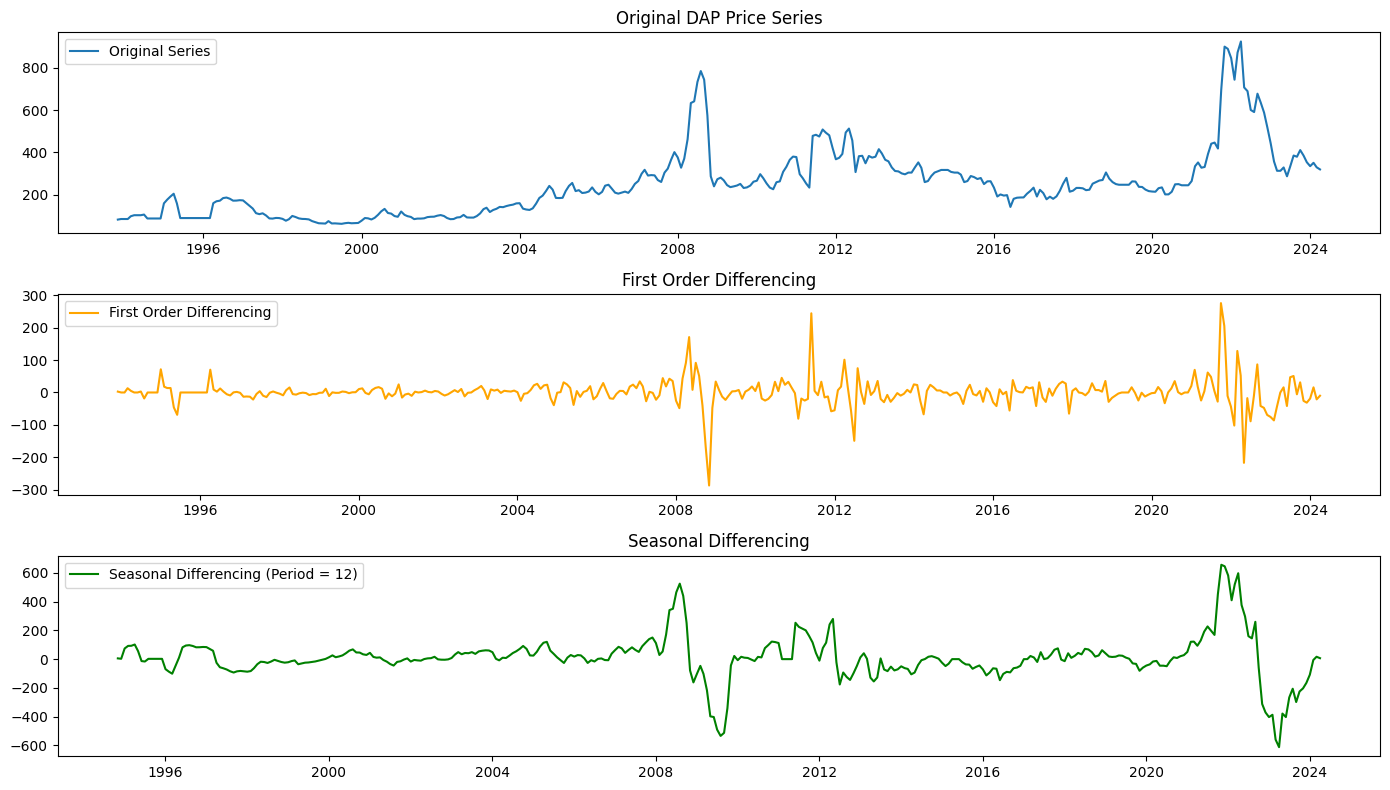

In [15]:
# Plotting the original series, first-order differencing, and seasonal differencing

plt.figure(figsize=(14, 8))

# Original Series
plt.subplot(3, 1, 1)
plt.plot(specific_data, label='Original Series')
plt.title('Original DAP Price Series')
plt.legend(loc='upper left')

# First Order Differencing
plt.subplot(3, 1, 2)
plt.plot(first_order_diff, label='First Order Differencing', color='orange')
plt.title('First Order Differencing')
plt.legend(loc='upper left')

# Seasonal Differencing
plt.subplot(3, 1, 3)
plt.plot(seasonal_diff, label='Seasonal Differencing (Period = 12)', color='green')
plt.title('Seasonal Differencing')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Transformasi Pangkat (Power Transform)
Transformasi berbasis pangkat untuk:
  - Menstabilkan varians
  - Membuat data lebih mirip dengan distribusi normal
  - Membuat data lebih linear dan lebih mudah untuk dimodelkan

#### Transformasi Box-Cox
- Transformasi Box-Cox dapat secara otomatis mengevaluasi dan memilih transformasi terbaik untuk set data tertentu
- Transformasi yang terbaik adalah yang membuat distribusi data paling mendekati normal
- Transformasi Box-Cox didefinisikan oleh sebuah parameter, lambda (λ), yang menentukan sifat transformasi yang diterapkan.

$$
y' =
\begin{cases}
\frac{y^\lambda - 1}{\lambda}, & \text{if } \lambda \neq 0 \\
\ln(y), & \text{if } \lambda = 0
\end{cases}
$$

| λ   | Transformasi                            |
|-----|-----------------------------------------|
| -1  | Transformasi resiprokal                 |
| -0.5| Transformasi akar kuadrat resiprokal    |
| 0   | Transformasi log                        |
| 0.5 | Transformasi akar kuadrat               |
| 1   | Tidak ada transformasi                  |



In [16]:
import matplotlib.pyplot as plt
from scipy.stats import boxcox, boxcox_normmax

In [17]:
# Performing Box-Cox transformation
boxcox_result, lmbda = boxcox(specific_data)
display(lmbda)

0.03261386202209302

In [18]:
# Creating a DataFrame with original and Box-Cox transformed values
specific_data_boxcox = pd.DataFrame({
    target_col: specific_data,
    'boxcox_price': boxcox_result
})

specific_data_boxcox.index = specific_data.index
specific_data_boxcox

,urea_price,boxcox_price
date,,
1993-11-01,82.80,4.750329
1993-12-01,85.50,4.787408
1994-01-01,85.50,4.787408
1994-02-01,85.50,4.787408
1994-03-01,98.63,4.952958
...,...,...
2023-12-01,354.00,6.468675
2024-01-01,335.38,6.403301
2024-02-01,351.25,6.459233


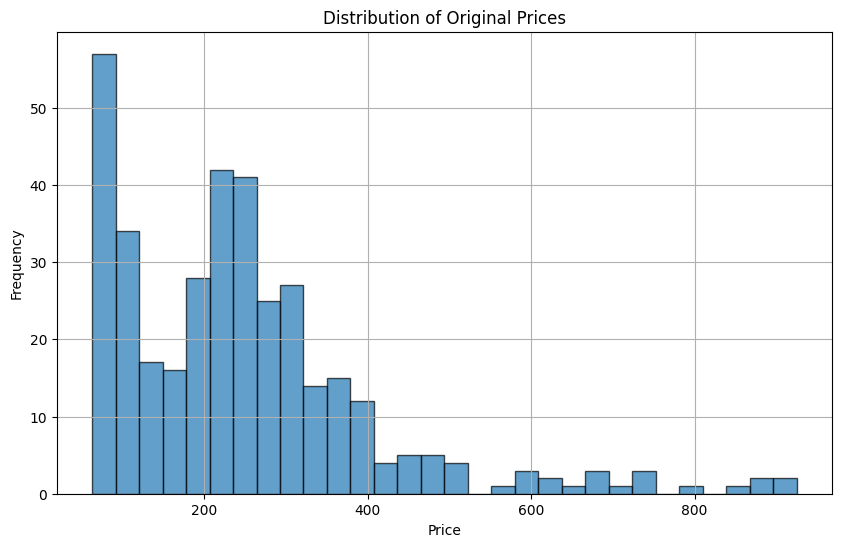

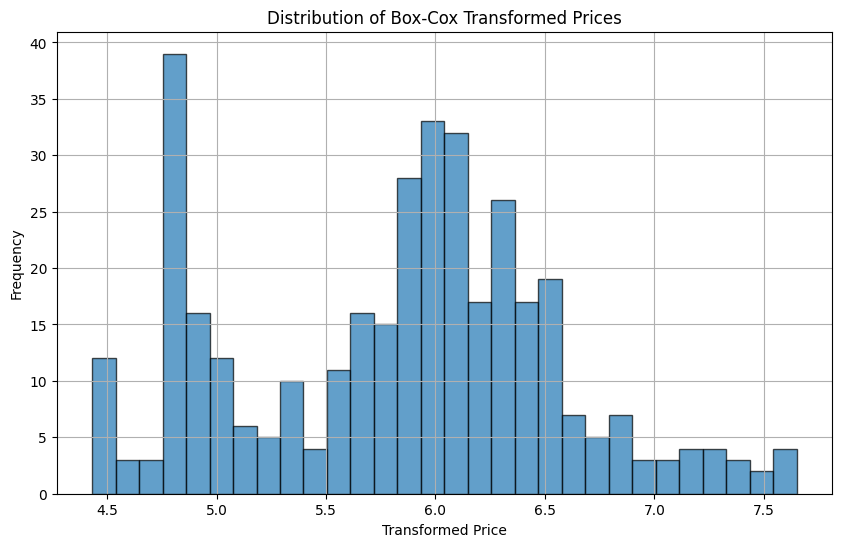

In [19]:
# Visualizing the distribution of the original urea_price data
plt.figure(figsize=(10, 6))
plt.hist(specific_data_boxcox[target_col], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Original Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualizing the distribution of the Box-Cox transformed data
plt.figure(figsize=(10, 6))
plt.hist(specific_data_boxcox['boxcox_price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Box-Cox Transformed Prices')
plt.xlabel('Transformed Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Evaluasi Peramalan Deret Waktu

Dalam evaluasi kinerja model, terdapat dua kategori utama: **scale-dependent** dan **scale-independent**.

### Scale-Dependent

1. **Mean Absolute Error (MAE)**
   - **Definisi**: MAE mengukur rata-rata selisih absolut antara nilai hasil prediksi dan nilai aktual.
   - **Formula**:

 $$\mathrm{MAE} = \frac{1}{n}\sum_{i=1}^{n}\left|D_{\mathrm{pre},i}-D_{\mathrm{act},i}\right|$$

   - **Keunggulan**: Mudah dihitung dan dipahami karena memiliki satuan yang sama dengan data asli
   - **Kelemahan**: Tidak cocok untuk membandingkan model pada data dengan skala yang berbeda

2. **Root Mean Squared Error (RMSE)**
   - **Definisi**: RMSE adalah akar dari rata-rata selisih kuadrat antara nilai prediksi dan nilai aktual.
   - **Formula**:
     $$\mathrm{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(D_{\mathrm{pre},i}-D_{\mathrm{act},i}\right)^2}$$
   - **Keunggulan**: Memberikan bobot lebih pada kesalahan yang lebih besar
   - **Kelemahan**: RMSE sulit digunakan untuk membandingkan model pada data dengan skala berbeda karena satuannya tergantung pada data

### Scale-Independent

1. **Mean Absolute Percentage Error (MAPE)**
   - **Definisi**: MAPE mengukur persentase rata-rata selisih absolut antara nilai prediksi dan nilai aktual.
   - **Formula**:
     $$\mathrm{MAPE} = \frac{100\%}{n}\sum_{i=1}^{n}\left|\frac{D_{\mathrm{pre},i}-D_{\mathrm{act},i}}{D_{\mathrm{act},i}}\right|$$
   - **Keunggulan**: MAPE mudah dipahami karena dinyatakan dalam persentase, sehingga lebih intuitif untuk interpretasi
   - **Kelemahan**: MAPE tidak dapat digunakan jika nilai aktual mendekati nol, karena dapat menghasilkan nilai yang tidak terdefinisi atau sangat besar

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def evaluate_forecast(y_true, y_pred):
    results = {
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred)
    }
    return pd.Series(results)

# Persiapan Data
## Pemisahan Train dan Test Set
- Pisahkan data menjadi train dan test
- Model hanya akan dilatih menggunakan data train
- Data test digunakan untuk mengevaluasi performa model
- Dalam konteks ini, harga beberapa bulan terakhir akan digunakan sebagai data test

In [21]:
n_test = 6

In [22]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(specific_data, test_size=n_test, shuffle=False)
display(train_data)
display(test_data)

,urea_price
date,
1993-11-01,82.80
1993-12-01,85.50
1994-01-01,85.50
1994-02-01,85.50
1994-03-01,98.63
...,...
2023-06-01,287.50
2023-07-01,334.63
2023-08-01,385.63


,urea_price
date,
2023-11-01,385.50
2023-12-01,354.00
2024-01-01,335.38
2024-02-01,351.25
2024-03-01,330.00
2024-04-01,320.00


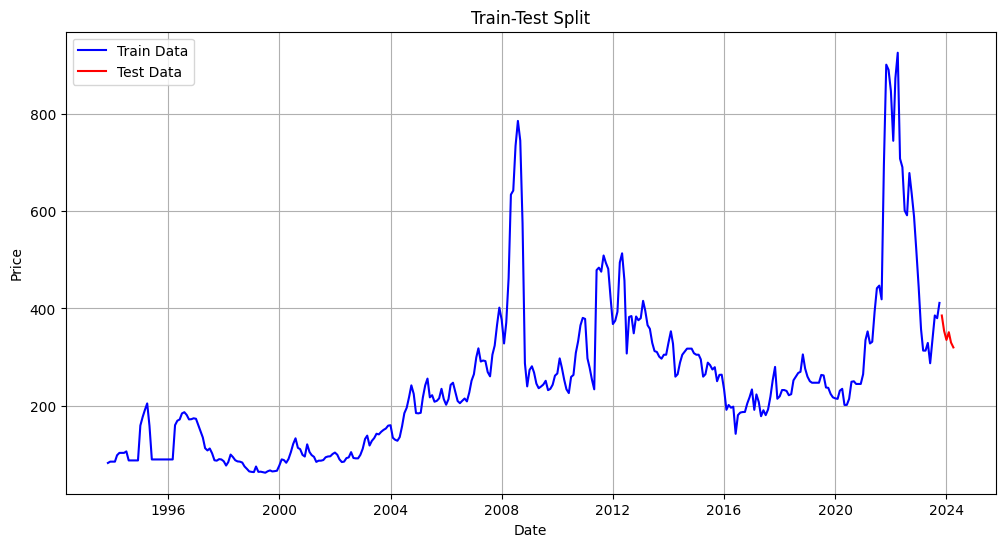

In [23]:
# Plot the train and test split
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train Data', color='blue')
plt.plot(test_data.index, test_data, label='Test Data', color='red')
plt.title('Train-Test Split')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Implementasi

## Model Statistik - ARIMA

### Install dan Import Library

In [ ]:
!pip install scipy==1.9.0

In [59]:
!pip install statsforecast
!pip install pycaret[full]
!pip install --upgrade scalecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scalecast: filename=SCALECAST-0.19.9-py3-none-any.whl size=125805 sha256=c090a0204e86fc062d4e9e32aff582f4a83f6f7f4f27a545c3dc1bf7f99d461d
  Stored in directory: /root/.cache/pip/wheels/c0/63/02/3dfe5b5cbdbffd10136943e110b6937714f71cb3047a48d0e5
Successfully built scalecast


In [25]:
import os
import pandas as pd
import numpy as np

### Implementasi AutoARIMA dengan Nixtla Statsforecast

In [26]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [27]:
statsforecast_df = pd.DataFrame({
    'unique_id': target_col,
    'ds': specific_data.index,
    'y': specific_data.values
})

statsforecast_df

,unique_id,ds,y
0,urea_price,1993-11-01,82.80
1,urea_price,1993-12-01,85.50
2,urea_price,1994-01-01,85.50
3,urea_price,1994-02-01,85.50
4,urea_price,1994-03-01,98.63
...,...,...,...
361,urea_price,2023-12-01,354.00
362,urea_price,2024-01-01,335.38
363,urea_price,2024-02-01,351.25
364,urea_price,2024-03-01,330.00


In [28]:
# Split Train and Test
train_data, test_data = train_test_split(statsforecast_df, test_size=n_test, shuffle=False)
display(train_data)
display(test_data)

,unique_id,ds,y
0,urea_price,1993-11-01,82.80
1,urea_price,1993-12-01,85.50
2,urea_price,1994-01-01,85.50
3,urea_price,1994-02-01,85.50
4,urea_price,1994-03-01,98.63
...,...,...,...
355,urea_price,2023-06-01,287.50
356,urea_price,2023-07-01,334.63
357,urea_price,2023-08-01,385.63
358,urea_price,2023-09-01,380.00


,unique_id,ds,y
360,urea_price,2023-11-01,385.50
361,urea_price,2023-12-01,354.00
362,urea_price,2024-01-01,335.38
363,urea_price,2024-02-01,351.25
364,urea_price,2024-03-01,330.00
365,urea_price,2024-04-01,320.00


In [29]:
target_name = target_col
target_col = 'y'

In [30]:
sf = StatsForecast(
    models = [AutoARIMA()],
    freq = 'MS'
)

In [31]:
sf.fit(train_data)
forecast = sf.predict(h=n_test, level=[95])
forecast

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95
unique_id,,,,
urea_price,2023-11-01,422.729218,343.569641,501.888824
urea_price,2023-12-01,419.137024,287.668243,550.605835
urea_price,2024-01-01,420.274017,257.014008,583.534058
urea_price,2024-02-01,419.914154,228.783798,611.044495
urea_price,2024-03-01,420.028046,204.979660,635.076416
urea_price,2024-04-01,419.992004,183.323593,656.660400


In [32]:
actual = test_data[target_col].values
pred = forecast['AutoARIMA'].values
comparison_df = pd.DataFrame({'Actual': actual, 'Predicted': pred})
comparison_df.index = test_data['ds']
comparison_df

,Actual,Predicted
ds,,
2023-11-01,385.50,422.729218
2023-12-01,354.00,419.137024
2024-01-01,335.38,420.274017
2024-02-01,351.25,419.914154
2024-03-01,330.00,420.028046
2024-04-01,320.00,419.992004


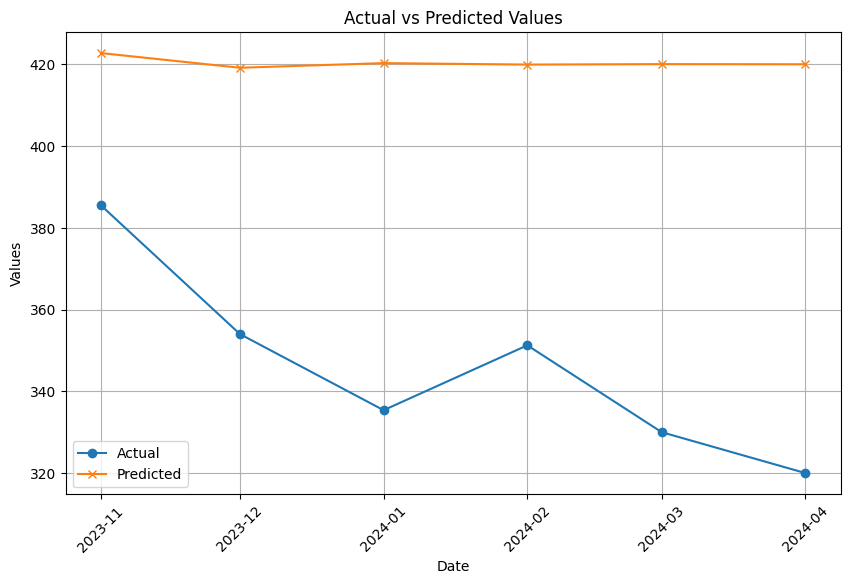

In [33]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Evaluating the model on the test predictions
evaluation_results = evaluate_forecast(comparison_df['Actual'], comparison_df['Predicted'])
evaluation_results

,0
MAPE,0.219079
RMSE,77.086593
MAE,74.324077


In [35]:
evaluation_summary = pd.DataFrame(columns=['Model',
                                           'Library',
                                           'Horizon'])

In [36]:
temp_eval = pd.DataFrame([evaluation_results])
temp_eval['Model'] = 'AutoARIMA'
temp_eval['Library'] = 'Nixtla Statsforecast'
temp_eval['Horizon'] = n_test
evaluation_summary = pd.concat([evaluation_summary, temp_eval], ignore_index=True)
display(evaluation_summary)

,Model,Library,Horizon,MAPE,RMSE,MAE
0,AutoARIMA,Nixtla Statsforecast,6,0.219079,77.086593,74.324077


### Implementasi ARIMA dengan PyCaret

In [37]:
target_col = 'urea_price'
target_col

'urea_price'

In [38]:
# Import pycaret time series and init setup
from pycaret.time_series import *
s = setup(
    specific_data,
    fh = n_test,
    target = target_col,
    session_id = 123,
    # transform_target='box-cox'
    )

,Description,Value
0,session_id,123
1,Target,urea_price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(366, 1)"
5,Transformed data shape,"(366, 1)"
6,Transformed train set shape,"(360, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [40]:
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()
exp.setup(
    specific_data,
    fh = n_test,
    target = target_col,
    session_id = 123,
    # transform_target='box-cox'
    )

,Description,Value
0,session_id,123
1,Target,urea_price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(366, 1)"
5,Transformed data shape,"(366, 1)"
6,Transformed train set shape,"(360, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [41]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,366.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,248.182459
3,Summary,Statistics,Transformed,Median,,230.88
4,Summary,Statistics,Transformed,Standard Deviation,,157.509455
5,Summary,Statistics,Transformed,Variance,,24809.228525
6,Summary,Statistics,Transformed,Kurtosis,,3.754894
7,Summary,Statistics,Transformed,Skewness,,1.667481
8,Summary,Statistics,Transformed,# Distinct Values,,300.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",3177.710562


In [44]:
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [50]:
# arima = create_model('auto_arima')
arima = create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-04,2.1905,1.4880,213.4930,217.6998,0.3332,0.2832,-23.2437
1,2022-10,1.3742,1.0324,141.9517,160.3271,0.3997,0.3127,-1.3550
2,2023-04,0.5162,0.4084,54.2557,64.0579,0.1446,0.1602,-1.3729
Mean,NaT,1.3603,0.9763,136.5668,147.3616,0.2925,0.2521,-8.6572
SD,NaT,0.6836,0.4425,65.1198,63.3905,0.1080,0.0661,10.3142


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [53]:
holdout_pred = predict_model(arima)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,0.7119,0.5893,75.1536,92.1844,0.2260,0.1931,-17.9082


In [56]:
plot_model(arima, plot = 'forecast')

In [57]:
plot_model(plot = 'acf')

In [58]:
plot_model(plot = 'diagnostics')

### Implementasi AutoARIMA dengan Scalecast

In [69]:
scalecast_df = pd.DataFrame({
    'date': specific_data.index,
    target_col : specific_data.values
})

scalecast_df

,date,urea_price
0,1993-11-01,82.80
1,1993-12-01,85.50
2,1994-01-01,85.50
3,1994-02-01,85.50
4,1994-03-01,98.63
...,...,...
361,2023-12-01,354.00
362,2024-01-01,335.38
363,2024-02-01,351.25
364,2024-03-01,330.00


In [70]:
from scalecast.Forecaster import Forecaster
f = Forecaster(
    y = scalecast_df[target_col],
    current_dates = scalecast_df[date_col],
    future_dates = n_test,
)
f

Forecaster(
    DateStartActuals=1993-11-01T00:00:00.000000000
    DateEndActuals=2024-04-01T00:00:00.000000000
    Freq=MS
    N_actuals=366
    ForecastLength=6
    Xvars=[]
    TestLength=0
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

In [71]:
f.set_test_length(n_test)

In [72]:
f.add_time_trend()
f.add_seasonal_regressors('month',raw=False,sincos=True)
f.add_ar_terms(12)
f

Forecaster(
    DateStartActuals=1993-11-01T00:00:00.000000000
    DateEndActuals=2024-04-01T00:00:00.000000000
    Freq=MS
    N_actuals=366
    ForecastLength=6
    Xvars=['t', 'monthsin', 'monthcos', 'AR1', 'AR2', 'AR3', 'AR4', 'AR5', 'AR6', 'AR7', 'AR8', 'AR9', 'AR10', 'AR11', 'AR12']
    TestLength=6
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

In [73]:
from scalecast.auxmodels import auto_arima
auto_arima(f,m=n_test)
f.plot_test_set(models='auto_arima')
plt.show()

In [74]:
# Export the model summaries
results = f.export(['model_summaries'])
results

,ModelNickname,Estimator,Xvars,HyperParams,Observations,DynamicallyTested,TestSetLength,CILevel,ValidationMetric,ValidationMetricValue,...,weights,best_model,InSampleRMSE,InSampleMAPE,InSampleMAE,InSampleR2,TestSetRMSE,TestSetMAPE,TestSetMAE,TestSetR2
0,auto_arima,arima,[],"{'order': (2, 1, 2), 'seasonal_order': (1, 0, ...",366,True,6,NaN,NaN,NaN,...,NaN,True,39.344685,0.084409,21.523896,0.937433,84.569992,0.241693,82.374926,-14.913593
